# Recurrent Neural Network (RNN)

## Content
* [Sequence Models](#1)
* [Recurrent Neural Network (RNN)](#2)
* [Implementing Recurrent Neural Network with Keras](#3)
    * [Loading and Preprocessing Data](#31)
    * [Create RNN Model](#32)
    * [Predictions and Visualising RNN Model](#33)

<a id="41"></a>
### Loading and Visualizing Data

In [2]:
# Importing the libraries: numpy, pandas
import numpy as np
import pandas as pd
# Importing the libraries: matplotlib, Sequential, Dense
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential


In [3]:
# Read AirPassengers
data=pd.read_csv('AirPassengers.csv')
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


<class 'numpy.ndarray'>


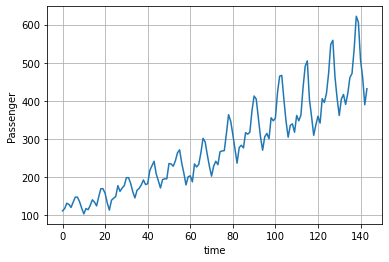

(144,)


In [12]:
# plot Number of Passenger=f(time)
datasets=data.iloc[:,1].values
print(type(datasets))
plt.plot(datasets)
plt.xlabel('time')
plt.ylabel('Passenger')
plt.grid()
plt.show()
print(datasets.shape)

<a id="42"></a>
### Preprocessing Data
* reshape
* change type
* scaling
* train test split
* Create dataset

In [15]:
# Reshape and astype
datasets=datasets.reshape(-1,1)
print(datasets.shape)
datasets=datasets.astype('float32')
print(type(datasets))

(144, 1)
<class 'numpy.ndarray'>


In [17]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
datasets_scaler=Scaler.fit_transform(datasets)

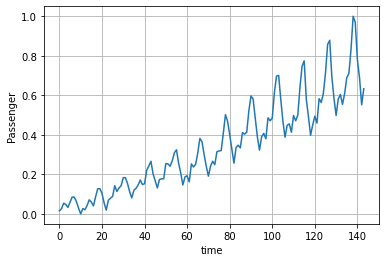

(144, 1)


In [18]:
# plot dataset_scaled
plt.plot(datasets_scaler)
plt.xlabel('time')
plt.ylabel('Passenger')
plt.grid()
plt.show()
print(datasets.shape)

In [23]:
# split train,test
train_size=int(len(datasets_scaler)*0.6)
print(train_size)
test_size=len(datasets_scaler)-train_size
print(test_size)
train=datasets_scaler[0:train_size,:]
test=datasets_scaler[train_size:len(datasets_scaler),:]

86
58


In [25]:
# Add time for train: Sequence
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = np.array(dataX)
trainY = np.array(dataY)  
print(trainX.shape)
print(trainY.shape)

(75, 10)
(75,)


In [26]:
# Add time for train: Sequence
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = np.array(dataX)
testY = np.array(dataY) 

In [27]:
# shape of TrainX, testX
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
print('shape of trainX: ', trainX.shape)
print('shape of testX: ', testX.shape)

shape of trainX:  (75, 10, 1)
shape of testX:  (47, 10, 1)


<a id="43"></a>
### Create RNN Model

In [28]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
# Initialising the RNN
regressor = Sequential()
# Adding the first RNN layer 
regressor.add(SimpleRNN(units = 100,activation='tanh', return_sequences = True, input_shape = (trainX.shape[1], 1)))
# Adding a second RNN layer 
regressor.add(SimpleRNN(units = 80,activation='tanh', return_sequences = True))
# Adding a third RNN layer 
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
# Adding a fourth RNN layer 
regressor.add(SimpleRNN(units = 30,activation='tanh', return_sequences = True))
# Adding a fifth RNN layer 
regressor.add(SimpleRNN(units = 20))
# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(trainX, trainY, epochs = 200, batch_size = 50, verbose = True)

Epoch 1/200
2/2 [==============================] - 5s 25ms/step - loss: 0.8888
Epoch 2/200
2/2 [==============================] - 0s 35ms/step - loss: 0.4360
Epoch 3/200
2/2 [==============================] - 0s 23ms/step - loss: 0.1781
Epoch 4/200
2/2 [==============================] - 0s 30ms/step - loss: 0.1408
Epoch 5/200
2/2 [==============================] - 0s 31ms/step - loss: 0.0257
Epoch 6/200
2/2 [==============================] - 0s 28ms/step - loss: 0.0750
Epoch 7/200
2/2 [==============================] - 0s 29ms/step - loss: 0.0515
Epoch 8/200
2/2 [==============================] - 0s 31ms/step - loss: 0.0135
Epoch 9/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0229
Epoch 10/200
2/2 [==============================] - 0s 30ms/step - loss: 0.0314
Epoch 11/200
2/2 [==============================] - 0s 26ms/step - loss: 0.0226
Epoch 12/200
2/2 [==============================] - 0s 24ms/step - loss: 0.0139
Epoch 13/200
2/2 [==============================]

2/2 [==============================] - 0s 33ms/step - loss: 0.0028
Epoch 104/200
2/2 [==============================] - 0s 34ms/step - loss: 0.0027
Epoch 105/200
2/2 [==============================] - 0s 34ms/step - loss: 0.0029
Epoch 106/200
2/2 [==============================] - 0s 31ms/step - loss: 0.0030
Epoch 107/200
2/2 [==============================] - 0s 27ms/step - loss: 0.0028
Epoch 108/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0027
Epoch 109/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0027
Epoch 110/200
2/2 [==============================] - 0s 50ms/step - loss: 0.0027
Epoch 111/200
2/2 [==============================] - 0s 31ms/step - loss: 0.0026
Epoch 112/200
2/2 [==============================] - 0s 31ms/step - loss: 0.0026
Epoch 113/200
2/2 [==============================] - 0s 27ms/step - loss: 0.0026
Epoch 114/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0026
Epoch 115/200
2/2 [=======================

In [29]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10, 100)           10200     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 10, 80)            14480     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 10, 50)            6550      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 10, 30)            2430      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 20)                1020      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 34,701
Trainable params: 34,701
Non-traina

Predictions and Visualising RNN Model

In [30]:
# evaluation of model
import math 
from sklearn.metrics import mean_squared_error

trainPredict = regressor.predict(trainX)
testPredict = regressor.predict(testX)
# invert predictions
trainPredict = Scaler.inverse_transform(trainPredict)
trainY = Scaler.inverse_transform([trainY])
testPredict = Scaler.inverse_transform(testPredict)
testY = Scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 19.88 RMSE
Test Score: 74.11 RMSE


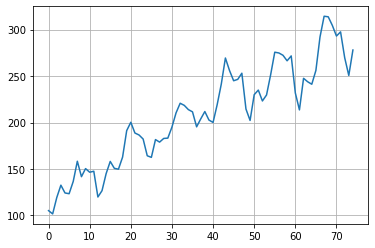

In [31]:
# plot trainPredict
plt.plot(trainPredict)
plt.grid()

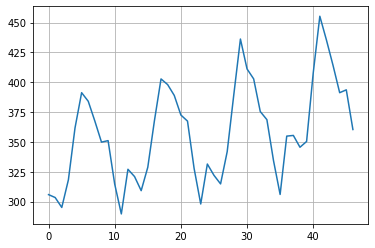

In [32]:
# plot testPredict
plt.plot(testPredict)
plt.grid()

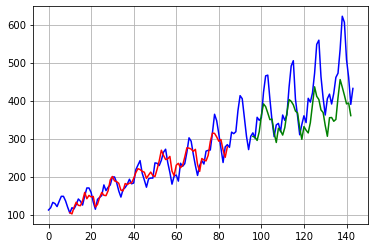

In [35]:
# shifting train
trainPredictPlot = np.empty_like(datasets)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = np.empty_like(datasets)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(datasets)-1, :] = testPredict
# plot baseline and predictions
plt.plot(Scaler.inverse_transform(datasets_scaler), color='b')
plt.plot(trainPredictPlot, color='r')
plt.plot(testPredictPlot, color='g')
plt.grid()
plt.show()

<a id="6"></a>
## Conclusion
* Sequence Models
* Recurrent Neural Network (RNN)
Implementing Recurrent Neural Network with Keras
    * Loading and Preprocessing Data
    * Create RNN Model
    * Predictions and Visualising RNN Model
* Long Short Term Memory (LSTMs)
* Implementing Long Short Term Memory with Keras
    * Loading and Visualizing Data
    * Preprocessing Data
    * Create LSTM Model
    * Predictions and Visualising RNN Model
    * Implementing Long Short Term Memory

REFERENCES
* Tutor: Kaan Can udemy course (deep learning)

In [ ]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
